In [1]:
import numpy as np
import cv2
import sys
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
# !pip install IPython
# !pip install pydot
# !pip install graphviz

In [3]:
vgg16_pretrained = keras.applications.vgg16.VGG16(weights = 'imagenet',
                                                 include_top = True,
                                                 input_shape = (224,224,3))

In [4]:
keras.utils.plot_model(vgg16_pretrained)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [5]:
print(vgg16_pretrained.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

(1, 224, 224, 3)


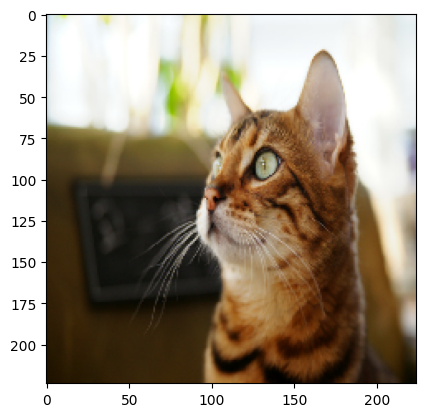

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


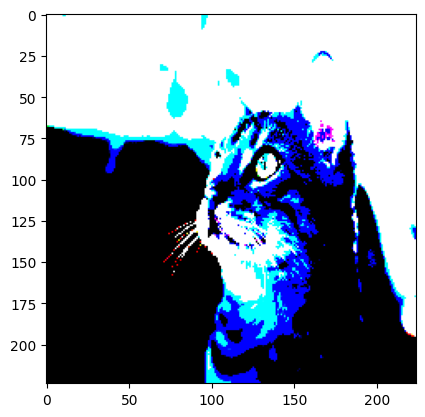

In [6]:
# img_path = './Ch_1_fig/fig/img/car1.jpg'
# img_path = './Ch_1_fig/fig/img/airplane_1'
# img_path = './Ch_1_fig/fig/img/beagle.jpg'
# img_path = './Ch_1_fig/fig/my_images/KakaoTalk_20230406_151400751.jpg'
img_path = './Ch_1_fig/fig/fig/cat.bmp'
img = keras.preprocessing.image.load_img(img_path, target_size=(224,224))
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = keras.applications.vgg16.preprocess_input(x)

# print(img)
# print(type(x))
# print(x.dtype)
print(x.shape)

plt.imshow(img)
plt.show()

plt.imshow(x[0])
plt.show()

In [7]:
output = vgg16_pretrained.predict(x)

classNames = keras.applications.vgg16.decode_predictions(output, top=3)
# print(np.argmax(output[0].flatten()))
print(classNames)
classNames[0][0]

1/1 [==============================] - 0s 399ms/step
[[('n02124075', 'Egyptian_cat', 0.5289897), ('n02123045', 'tabby', 0.24472612), ('n02123159', 'tiger_cat', 0.17279398)]]


('n02124075', 'Egyptian_cat', 0.5289897)

In [8]:
className = classNames[0][0][1]
prob = classNames[0][0][2]

print(className, prob)

Egyptian_cat 0.5289897


In [9]:
img_opencv = cv2.imread(img_path)

text = f'{className},{prob*100:.2f}%'
cv2.putText(img_opencv, text, (10,30), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,0,255), 1, cv2.LINE_AA)

cv2.imshow('image',img_opencv)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
import glob

img_paths = glob.glob('./Ch_1_fig/fig/fig/*.*')

for i in img_paths:
    x = keras.preprocessing.image.load_img(i, target_size=(224,224,3))
    x = keras.preprocessing.image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    x = keras.applications.vgg16.preprocess_input(x)
    
#     x = img_paths(i)
    output = vgg16_pretrained.predict(x)

    classNames = keras.applications.vgg16.decode_predictions(output, top=3)
    # print(np.argmax(output[0].flatten()))
#     print(classNames)
    className = classNames[0][0][1]
    prob = classNames[0][0][2]

    img_opencv = cv2.imread(i)

    text = f'{className},{prob*100:.2f}%'
    cv2.putText(img_opencv, text, (10,30), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,0,255), 1, cv2.LINE_AA)
    
    cv2.imshow('img',img_opencv)
    
    if cv2.waitKey(3000) == 27:
        break
        
cv2.destroyAllWindows()

1/1 [==============================] - 0s 195ms/step
